<a href="https://colab.research.google.com/github/ultimatecrack/NLP-Master/blob/master/NLP%20Zero%20to%20Hero/irish_poetry_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-07-27 15:19:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-07-27 15:19:26 (89.4 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [5]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [8]:
corpus

['come all ye maidens young and fair',
 'and you that are blooming in your prime',
 'always beware and keep your garden fair',
 'let no man steal away your thyme',
 'for thyme it is a precious thing',
 'and thyme brings all things to my mind',
 'nlyme with all its flavours, along with all its joys',
 'thyme, brings all things to my mind',
 'once i and a bunch of thyme',
 'i thought it never would decay',
 'then came a lusty sailor',
 'who chanced to pass my way',
 'and stole my bunch of thyme away',
 'the sailor gave to me a rose',
 'a rose that never would decay',
 'he gave it to me to keep me reminded',
 'of when he stole my thyme away',
 'sleep, my child, and peace attend thee',
 'all through the night',
 'guardian angels god will send thee',
 'soft the drowsy hours are creeping',
 'hill and dale in slumber sleeping',
 'i my loving vigil keeping',
 'while the moon her watch is keeping',
 'while the weary world is sleeping',
 'oer thy spirit gently stealing',
 'visions of delight rev

In [13]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [14]:
input_sequences

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35],
 [118, 35, 119],
 [118, 35, 119, 799],
 [118, 35, 119, 799, 56],
 [118, 35, 119, 799, 56, 24],
 [118, 35, 119, 799, 56, 24, 184],
 [10, 184],
 [10, 184, 25],
 [10, 184, 25, 23],
 [10, 184, 25, 23, 5],
 [10, 184, 25, 23, 5, 580],
 [10, 184, 25, 23, 5, 580, 456],
 [2, 184],
 [2, 184, 800],
 [2, 184, 800, 12],
 [2, 184, 800, 12, 801],
 [2, 184, 800, 12, 801, 4],
 [2, 184, 800, 12, 801, 4, 7],
 [2, 184, 800, 12, 801, 4, 7, 235],
 [1219, 17],
 [1219, 17, 12],
 [1219, 17, 12, 75],
 [1219, 17, 12, 75, 1220],
 [1219, 17, 12, 75, 1220, 236],
 [1219, 17, 12, 75, 1

In [17]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
max_sequence_len

16

In [18]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [20]:
input_sequences

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]], dtype=int32)

In [21]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [22]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [23]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [24]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [25]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [26]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [27]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 [==============================] - 7s 20ms/step - loss: 6.6705 - accuracy: 0.0743
Epoch 2/100
377/377 [==============================] - 7s 20ms/step - loss: 5.7763 - accuracy: 0.1139
Epoch 3/100
377/377 [==============================] - 7s 20ms/step - loss: 4.9185 - accuracy: 0.1641
Epoch 4/100
377/377 [==============================] - 7s 20ms/step - loss: 3.9947 - accuracy: 0.2317
Epoch 5/100
377/377 [==============================] - 7s 20ms/step - loss: 3.1181 - accuracy: 0.3438
Epoch 6/100
377/377 [==============================] - 7s 20ms/step - loss: 2.4643 - accuracy: 0.4414
Epoch 7/100
377/377 [==============================] - 7s 20ms/step - loss: 1.9710 - accuracy: 0.5424
Epoch 8/100
377/377 [==============================] - 7s 20ms/step - loss: 1.5785 - accuracy: 0.6245
Epoch 9/100
377/377 [==============================] - 7s 20ms/step - loss: 1.3482 - accuracy: 0.6751
Epoch 10/100
377/377 [==============================] - 7s 20ms/step - loss: 1.166

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

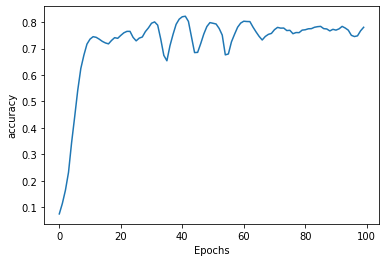

In [29]:
plot_graphs(history, 'accuracy')


In [30]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this one consolation the lonely danny old woman did salute her gone gone gone love gone away gone from as irish hand fought without corporal casey them please feet begin to claret heavens soon gone love easy easy as sinking sinking dear right grave it fought easy gone love easy as our comrades who gone and ill take you for credit is remain still kept shapes nature never designed high high love easy as our comrades who died who is seven go there at morn my rapier air i resound fade abusing farrell there for now grow care grow care grow
